## ANALISIS EXPLORATORIO DE DATOS - Proyecto Churn

#### Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### Carga de datos

In [2]:
df = pd.read_csv('src/dataset_churn.csv')

# Vista general
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,...,total_ss_past30d,total_ss_past90d,avg_ss_per_wk,avg_ss_duration_min,std_ss_duration_min,ratio_ss_time_recent_vs_past,ratio_events_sessios,ratio_failed_ss,total_opened_push,Churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,...,1,2,0.458333,18.230805,14.026740,0.699703,-1.386294,-2.484907,2,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,...,0,15,1.238095,22.245788,20.961316,-1.855429,-1.686399,-3.295837,8,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,...,5,22,2.038462,32.271163,28.065546,-0.296098,-0.325422,-3.988984,18,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,...,2,3,0.347826,9.090539,4.638817,0.431595,-0.810930,-2.197225,0,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,...,8,13,0.923077,21.021590,14.791833,1.297259,-1.139434,-3.218876,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9455 entries, 0 to 9454
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   CustomerId                    9455 non-null   int64  
 1   CreditScore                   9455 non-null   int64  
 2   Geography                     9455 non-null   object 
 3   Gender                        9455 non-null   object 
 4   Age                           9455 non-null   int64  
 5   Tenure                        9455 non-null   int64  
 6   Balance                       9455 non-null   float64
 7   NumOfProducts                 9455 non-null   int64  
 8   HasCrCard                     9455 non-null   int64  
 9   IsActiveMember                9455 non-null   int64  
 10  EstimatedSalary               9455 non-null   float64
 11  days_since_last_tx            9455 non-null   int64  
 12  txs_avg_amount                9455 non-null   float64
 13  amo

In [4]:
df.shape

(9455, 31)

In [5]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
CustomerId,9455.0,15690902.03,71850.59,15565701.00,15628818.50,15690744.00,15752913.50,15815690.00
CreditScore,9455.0,650.43,96.71,350.00,584.00,652.00,718.00,850.00
Age,9455.0,38.77,10.47,18.00,32.00,37.00,44.00,92.00
Tenure,9455.0,5.20,2.77,0.00,3.00,5.00,8.00,10.00
Balance,9455.0,76109.32,62452.57,0.00,0.00,96834.78,127460.85,250898.09
NumOfProducts,9455.0,1.53,0.58,1.00,1.00,1.00,2.00,4.00
HasCrCard,9455.0,0.71,0.45,0.00,0.00,1.00,1.00,1.00
IsActiveMember,9455.0,0.52,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,9455.0,99923.90,57472.07,11.58,50942.00,99828.45,149054.96,199992.48
days_since_last_tx,9455.0,4.25,14.69,1.00,1.00,1.00,3.00,180.00


#### Limpieza básica

In [6]:
# Duplicados
print("Duplicados:", df.duplicated().sum())

# Nulos
df.isnull().sum().sort_values(ascending=False)

# Tipos de datos
df.dtypes.value_counts()

Duplicados: 0


float64    16
int64      13
object      2
Name: count, dtype: int64

#### Distribución de variables numéricas 

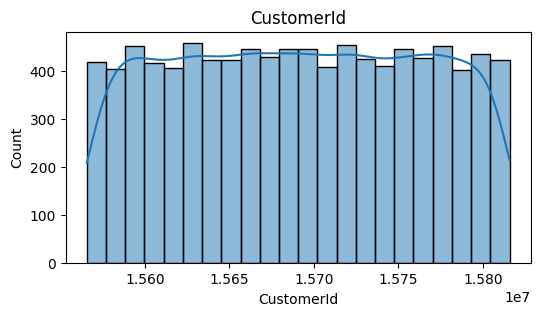

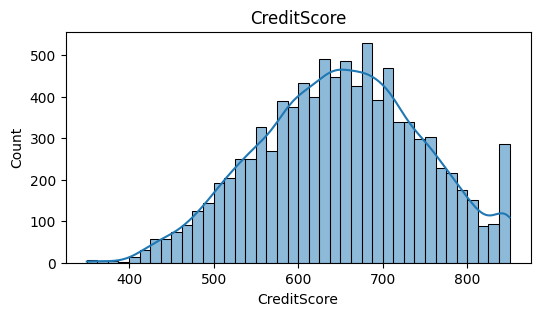

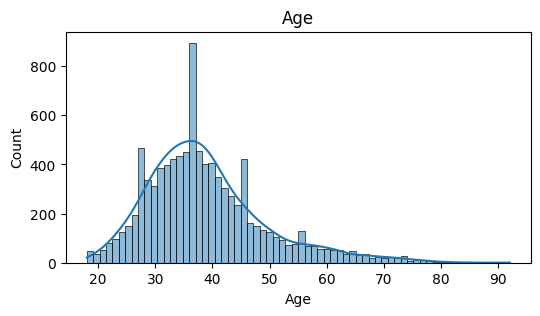

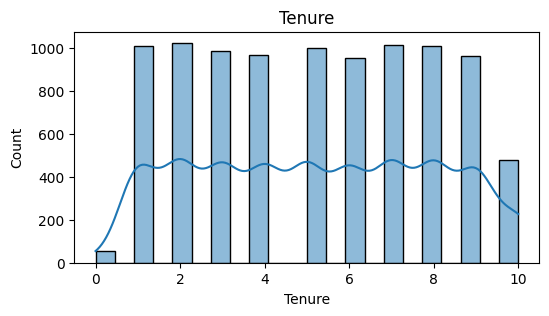

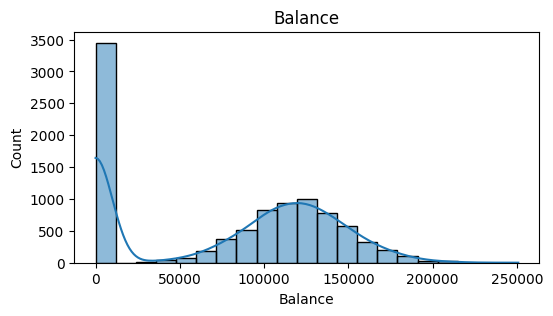

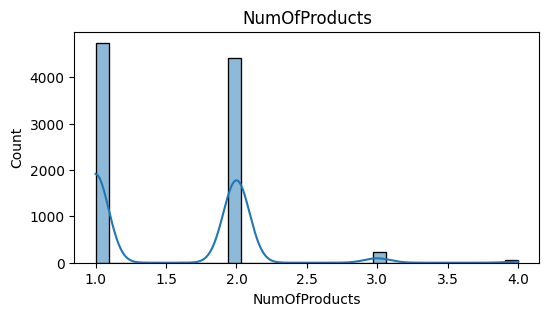

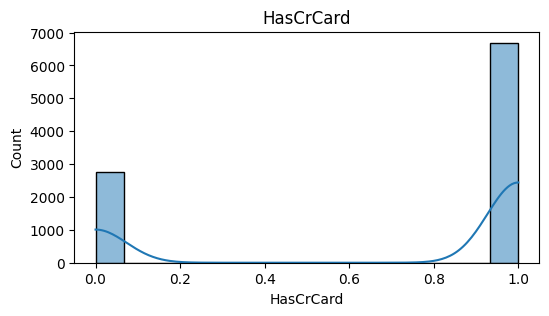

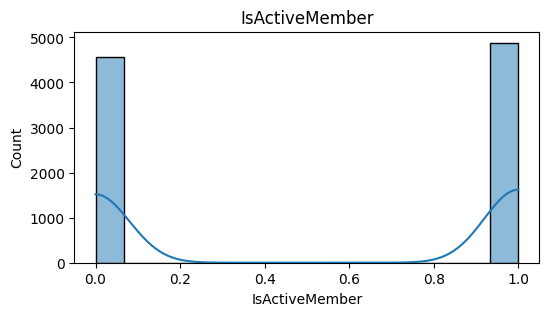

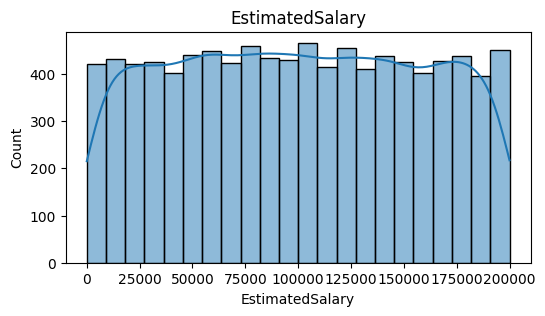

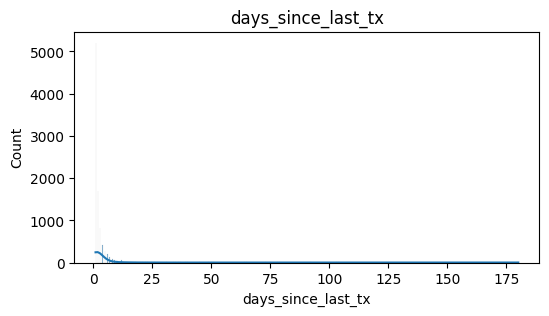

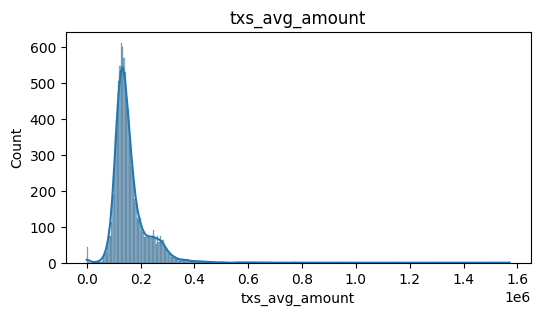

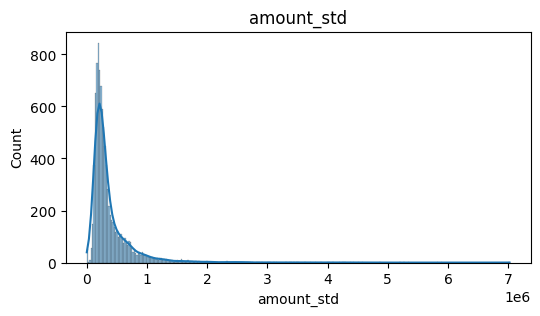

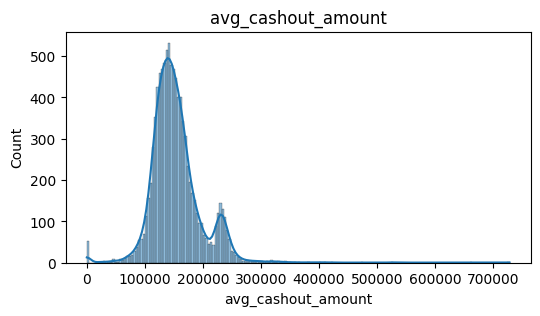

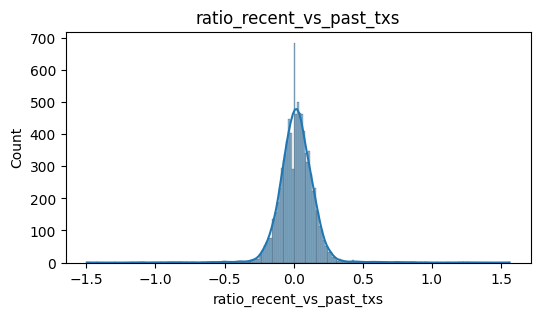

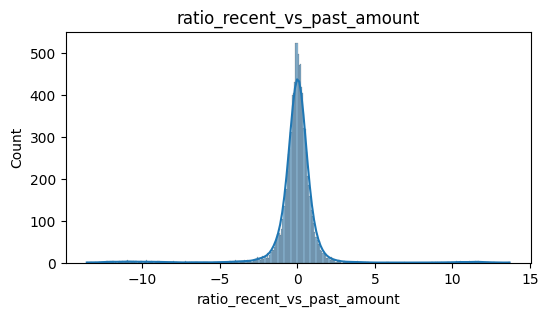

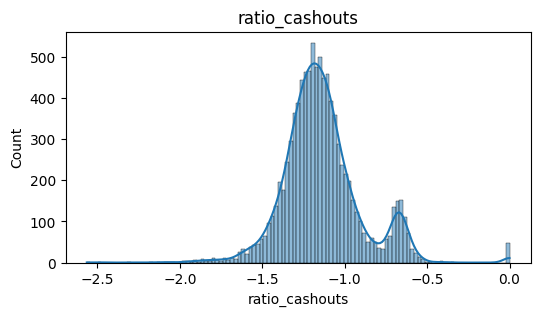

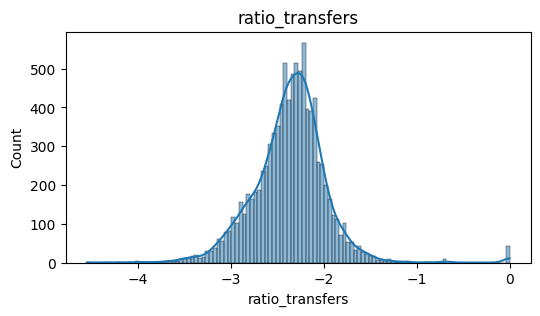

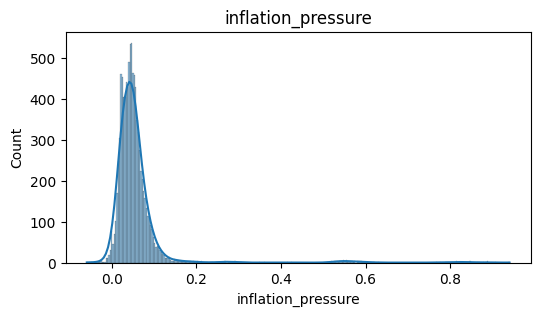

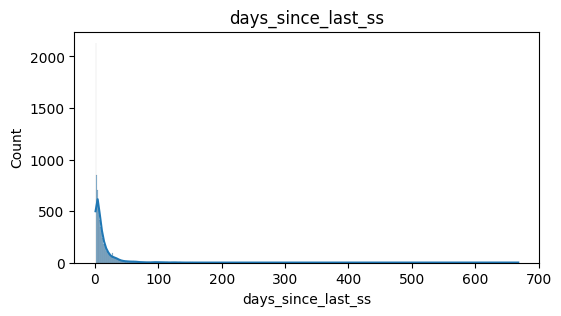

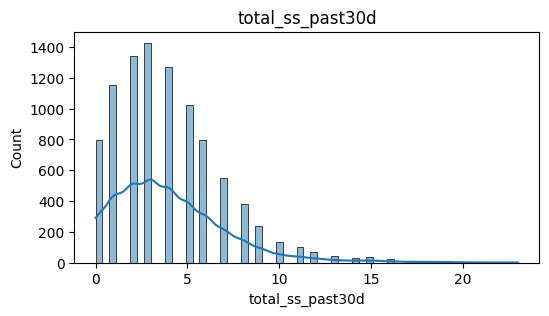

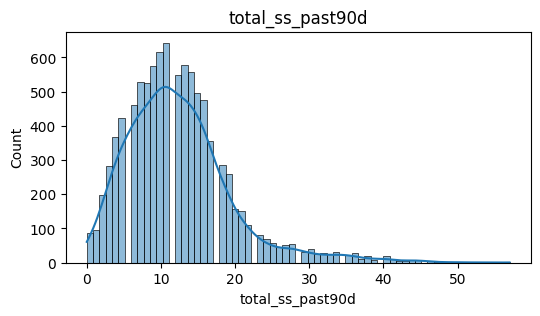

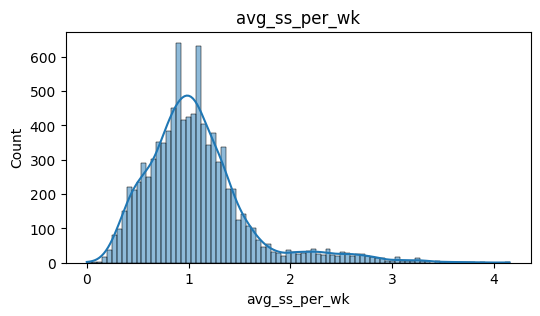

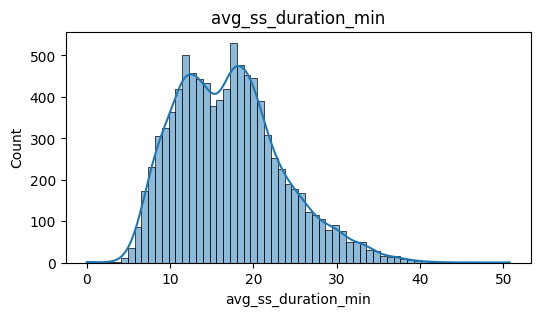

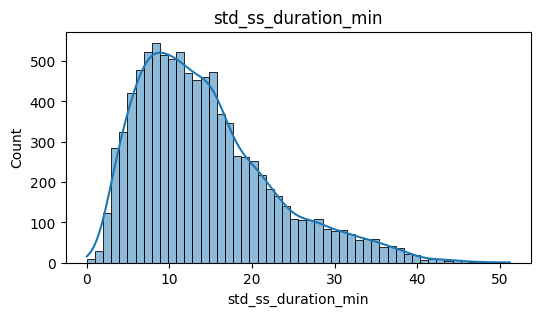

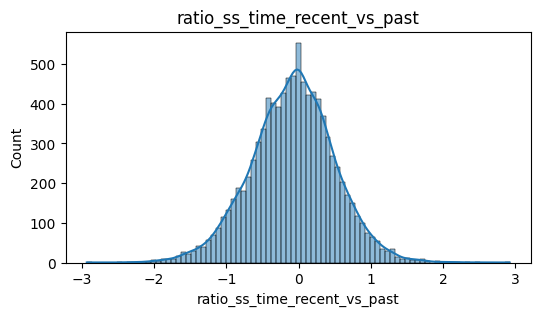

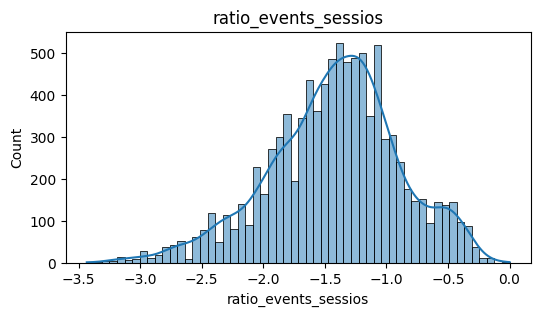

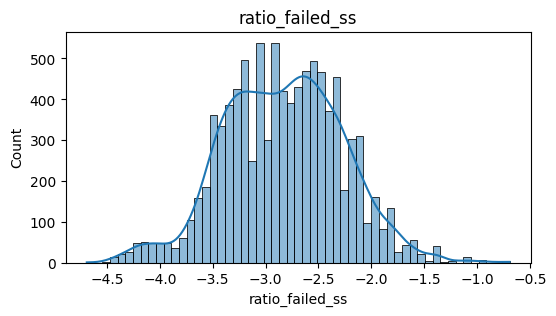

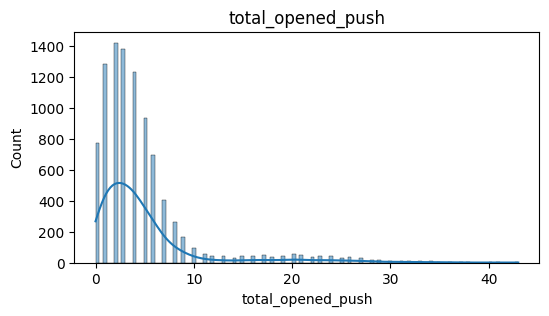

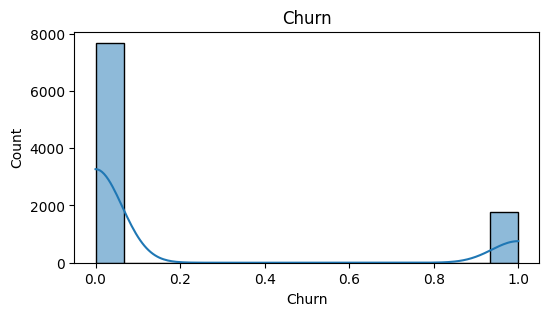

In [7]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.show()

#### Distribución del target (churn)

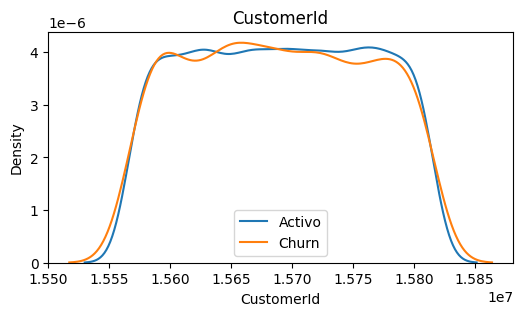

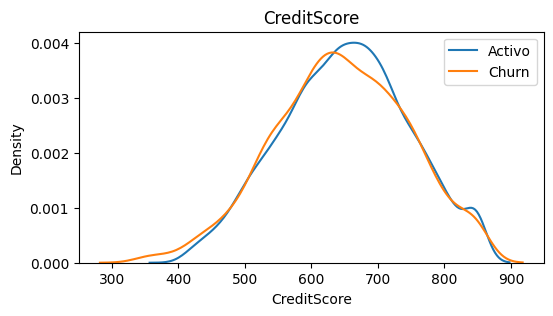

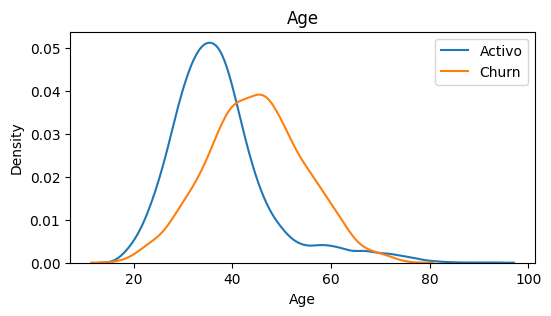

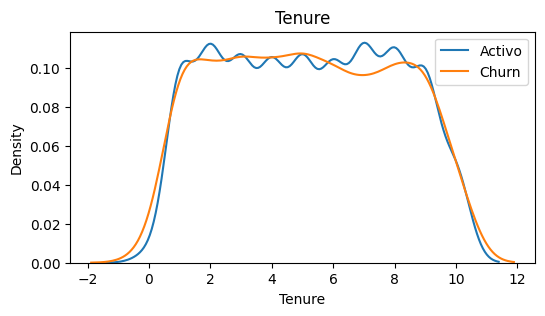

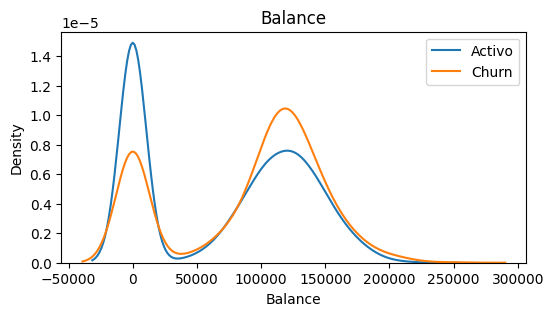

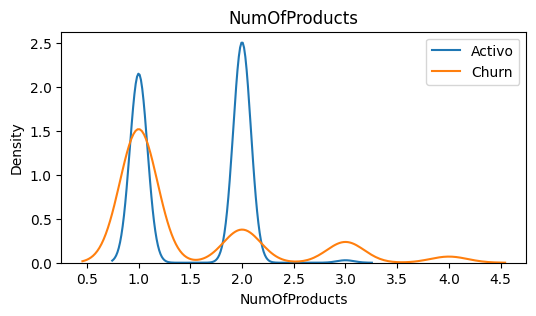

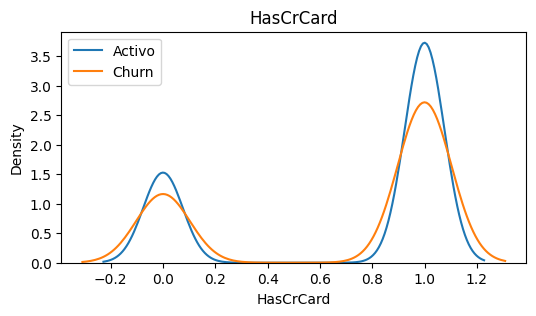

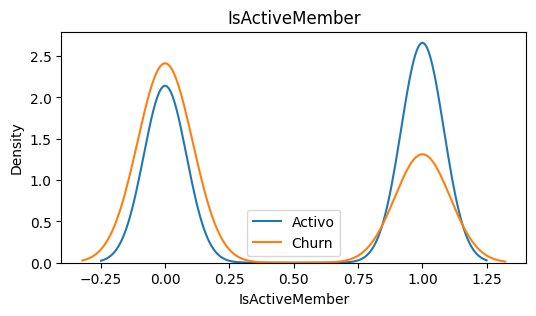

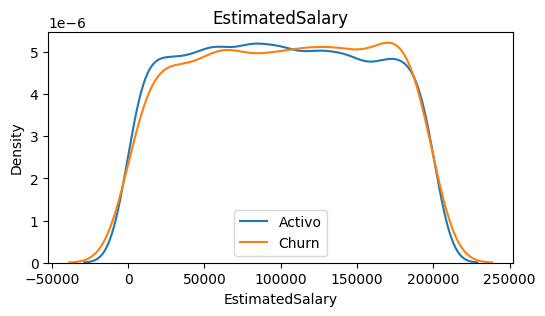

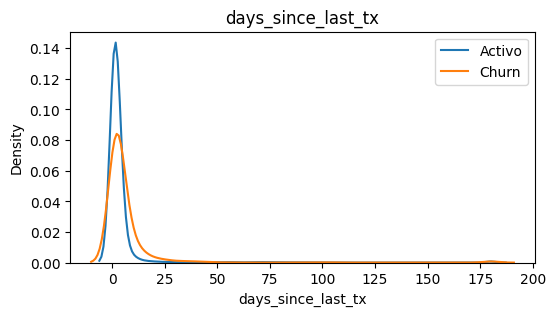

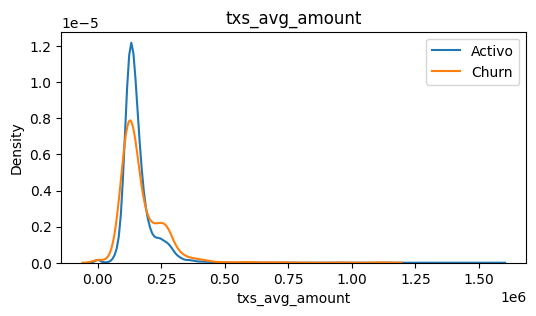

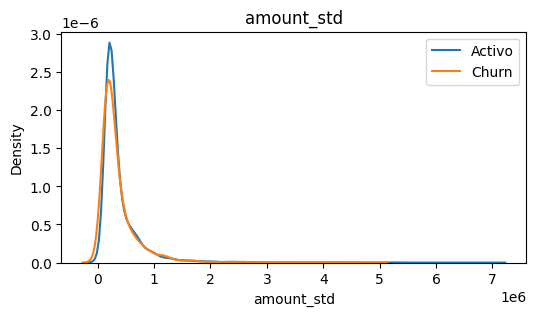

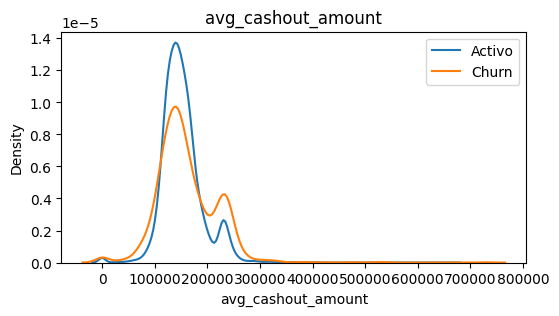

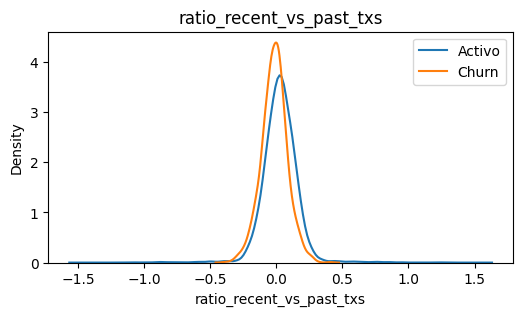

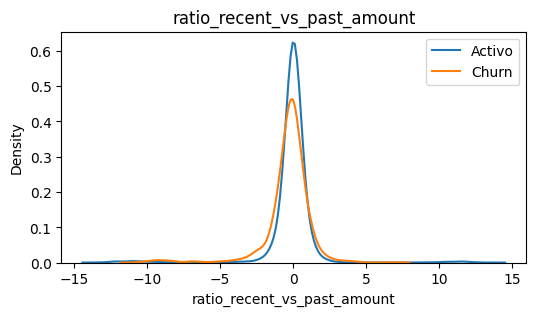

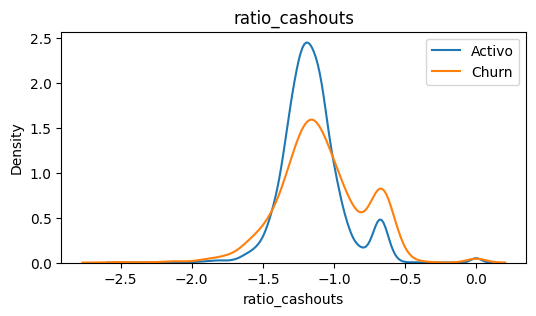

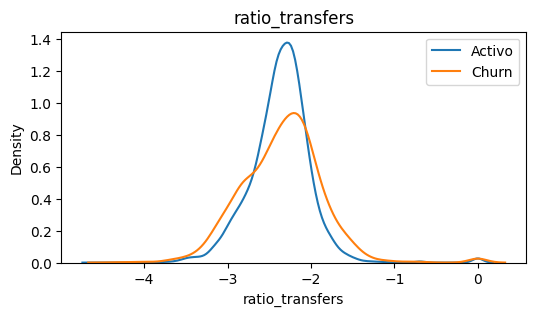

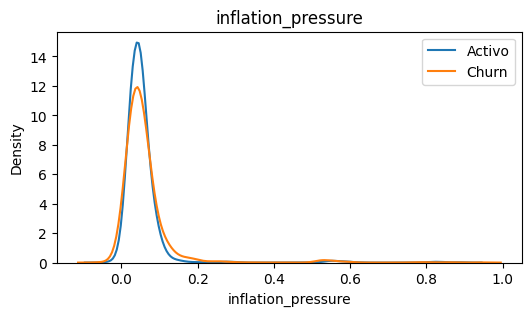

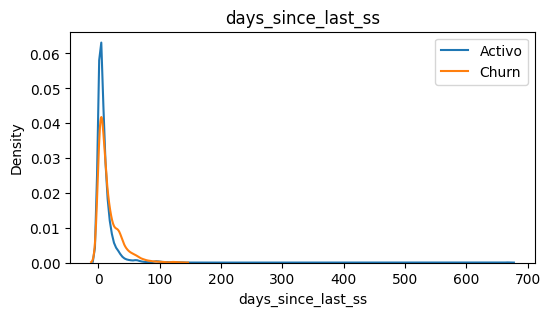

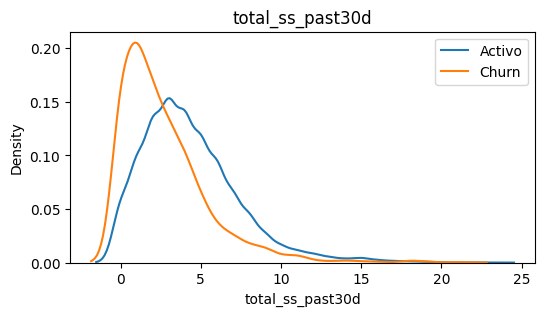

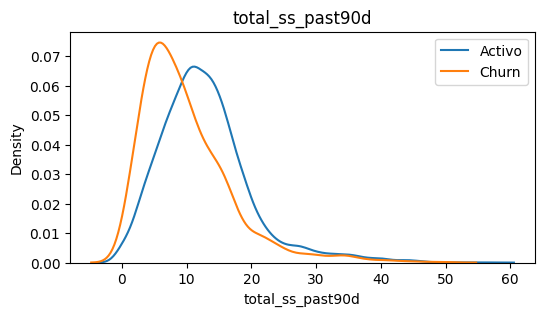

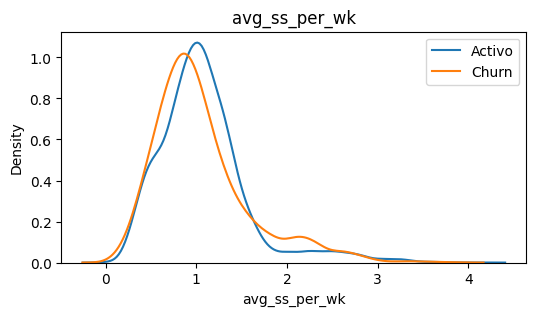

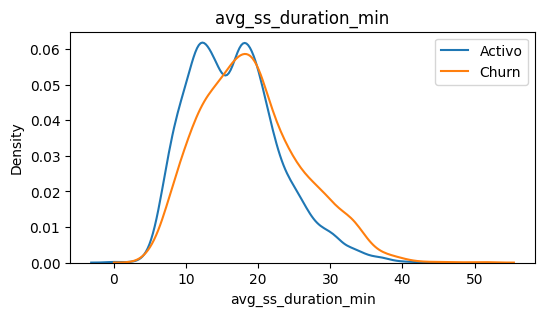

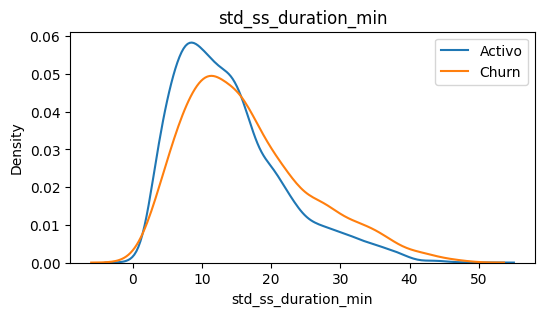

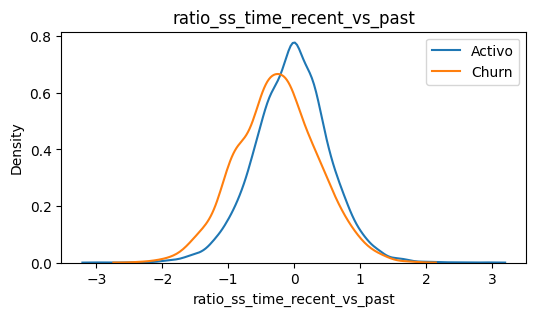

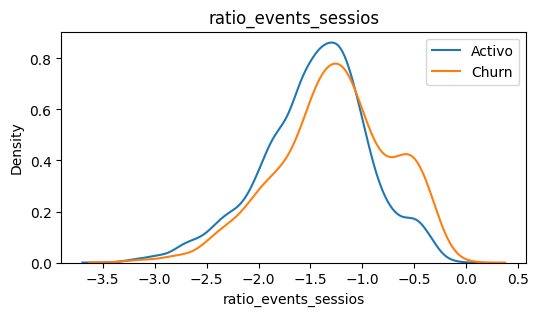

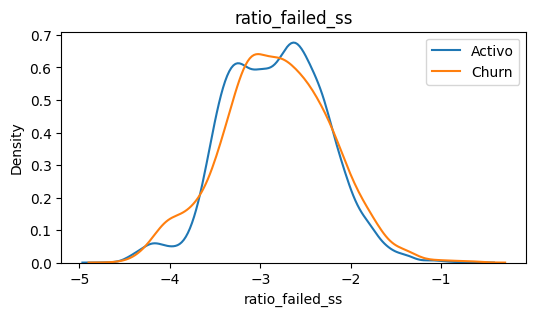

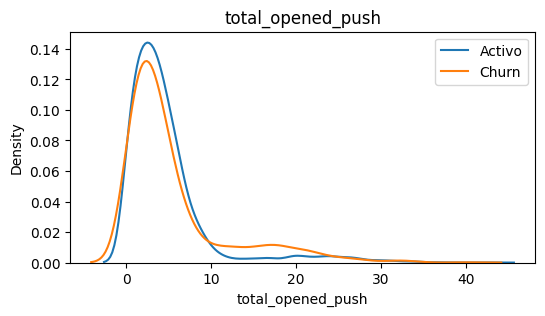

C:\Users\Admin\AppData\Local\Temp\ipykernel_8160\1404084573.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df.loc[df['Churn']==0, col], label='Activo')
C:\Users\Admin\AppData\Local\Temp\ipykernel_8160\1404084573.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df.loc[df['Churn']==1, col], label='Churn')
C:\Users\Admin\AppData\Local\Temp\ipykernel_8160\1404084573.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


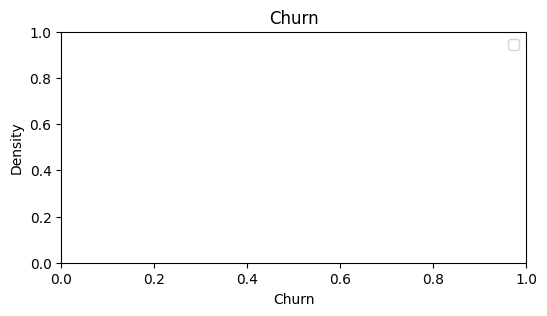

In [8]:
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.kdeplot(df.loc[df['Churn']==0, col], label='Activo')
    sns.kdeplot(df.loc[df['Churn']==1, col], label='Churn')
    plt.title(col)
    plt.legend()
    plt.show()



#### Correlaciones

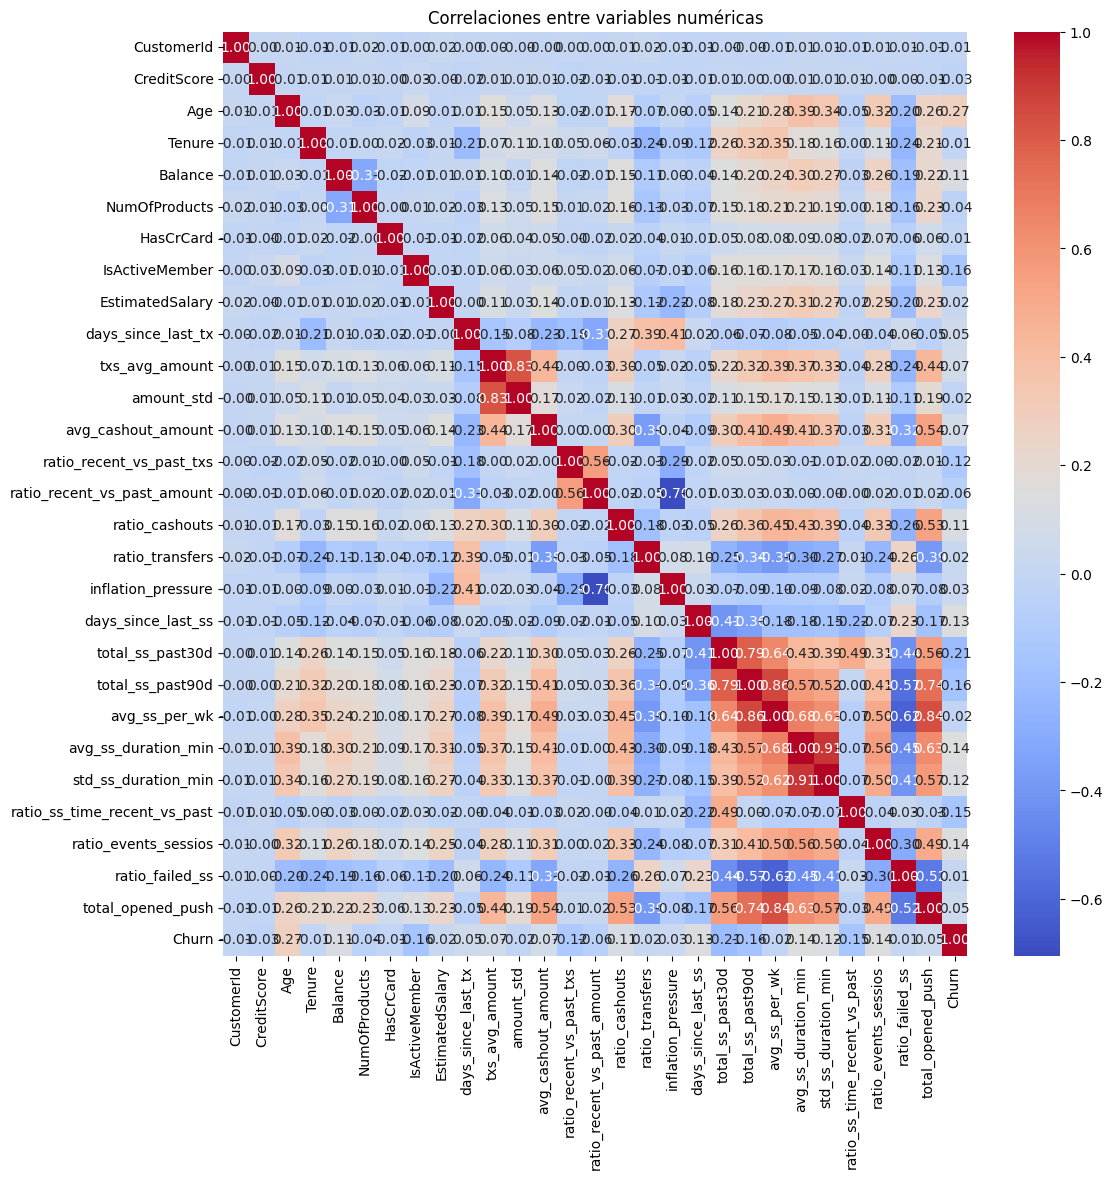

In [9]:
plt.figure(figsize=(12,12))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlaciones entre variables numéricas')
plt.show()


#### Variables categóricas

In [10]:
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    display(df[col].value_counts(normalize=True))


Geography
France     0.502909
Spain      0.248757
Germany    0.248334
Name: proportion, dtype: float64

Gender
Male      0.549127
Female    0.450873
Name: proportion, dtype: float64